# Plots with confidence interval

In [25]:
import os
import numpy as np
from scipy.stats import t as student_variable


max_bellman_iterations = 2
n_repetitions_list = np.array([2, 5, 20])
str_repetitions = ""

operators = ["optimal"]
for n_repetitions in n_repetitions_list:
    str_repetitions += "_" + str(n_repetitions)
    operators.append(f"max_linear_{n_repetitions}")

# Get the seeds
used_seed = []

for file in os.listdir("figures/data/PBO_max_linear/"):
    if int(file.split("_")[0]) == max_bellman_iterations and str_repetitions == file[-4 -len(str_repetitions): -4]:
        used_seed.append(int(file.split("_")[2]))

seeds = np.unique(used_seed)


def confidence_interval(mean, std, n_samples, confidence_level=0.95):
    t_crit = np.abs(student_variable.ppf((1 - confidence_level) / 2, n_samples - 1))
    lower_bound = mean - t_crit * (std / np.sqrt(n_samples))
    upper_bound = mean + t_crit * (std / np.sqrt(n_samples))

    return lower_bound, upper_bound

## Extract the statistics

In [26]:
import matplotlib.pyplot as plt 

def extract_statistics(nature):
    # Get the data
    data = {}

    for operator in operators:
        data[operator] = []
        for seed in seeds:
            data[operator].append(np.load(f"figures/data/PBO_max_linear/{max_bellman_iterations}_{nature}_{seed}_{operator}{str_repetitions}.npy"))

        data[operator] = np.array(data[operator])

    # Build statistics
    statistics = {}

    for operator in operators:
        n_samples = data[operator].shape[0]
        means = data[operator].mean(axis=0)
        stds = data[operator].std(axis=0)

        statistics[operator] = {"mean": means, "lower_bound": [], "upper_bound": []}

        if operator != "linear_fixed_point":
            for iteration in range(len(means)):
                low_bound, upper_bound = confidence_interval(means[iteration], stds[iteration], n_samples)
                statistics[operator]["lower_bound"].append(low_bound)
                statistics[operator]["upper_bound"].append(upper_bound)
        else:
            low_bound, upper_bound = confidence_interval(means, stds, n_samples)
            statistics[operator]["lower_bound"].append(low_bound)
            statistics[operator]["upper_bound"].append(upper_bound)   
  
        statistics[operator]["lower_bound"] = np.array(statistics[operator]["lower_bound"])    
        statistics[operator]["upper_bound"] = np.array(statistics[operator]["upper_bound"])


    return statistics, data["optimal"].shape[1]

## Plots

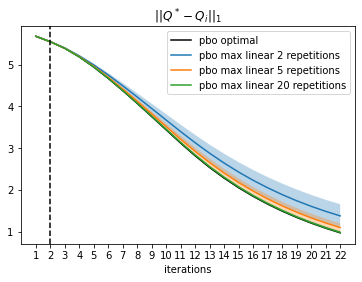

In [27]:
import matplotlib.pyplot as plt 

statistics, max_bellman_iterations_validation = extract_statistics("Q")

iterations = range(1, max_bellman_iterations_validation + 1)

plt.plot(iterations, statistics["optimal"]["mean"], label=f"pbo optimal", color="black")
plt.fill_between(iterations, statistics["optimal"]["lower_bound"], statistics["optimal"]["upper_bound"], color="black", alpha=0.3)

for operator in operators:
    if operator != "optimal":
        label = operator.replace("_", " ") + " repetitions"
        plt.plot(iterations, statistics[operator]["mean"], label=f"pbo {label}")
        plt.fill_between(iterations, statistics[operator]["lower_bound"], statistics[operator]["upper_bound"], alpha=0.3)

plt.axvline(max_bellman_iterations, color="black", linestyle="--")

plt.xticks(iterations)
plt.xlabel("iterations")

plt.title(r"$|| Q^* - Q_i ||_1$")
plt.legend()
_ = plt.savefig(f"figures/PBO_max_linear_{max_bellman_iterations}_Q.jpg", bbox_inches='tight')

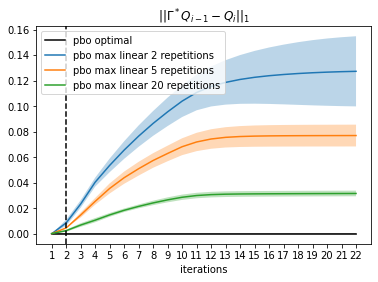

In [28]:
import matplotlib.pyplot as plt 

statistics, max_bellman_iterations_validation = extract_statistics("BE")

iterations = range(1, max_bellman_iterations_validation + 1)

plt.plot(iterations, statistics["optimal"]["mean"], label=f"pbo optimal", color="black")
plt.fill_between(iterations, statistics["optimal"]["lower_bound"], statistics["optimal"]["upper_bound"], color="black", alpha=0.3)

for operator in operators:
    if operator != "optimal":
        label = operator.replace("_", " ") + " repetitions"
        plt.plot(iterations, statistics[operator]["mean"], label=f"pbo {label}")
        plt.fill_between(iterations, statistics[operator]["lower_bound"], statistics[operator]["upper_bound"], alpha=0.3)

plt.axvline(max_bellman_iterations, color="black", linestyle="--")

plt.xticks(iterations)
plt.xlabel("iterations")

plt.title(r"$|| \Gamma^*Q_{i-1} - Q_i ||_1$")
plt.legend()
_ = plt.savefig(f"figures/PBO_max_linear_{max_bellman_iterations}_BE.jpg", bbox_inches='tight')

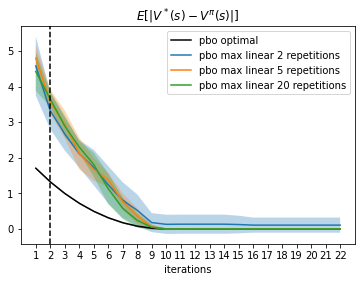

In [29]:
import matplotlib.pyplot as plt 

statistics, max_bellman_iterations_validation = extract_statistics("V")

iterations = range(1, max_bellman_iterations_validation + 1)

plt.plot(iterations, statistics["optimal"]["mean"], label=f"pbo optimal", color="black")
plt.fill_between(iterations, statistics["optimal"]["lower_bound"], statistics["optimal"]["upper_bound"], color="black", alpha=0.3)

for operator in operators:
    if operator != "optimal":
        label = operator.replace("_", " ") + " repetitions"
        plt.plot(iterations, statistics[operator]["mean"], label=f"pbo {label}")
        plt.fill_between(iterations, statistics[operator]["lower_bound"], statistics[operator]["upper_bound"], alpha=0.3)

plt.axvline(max_bellman_iterations, color="black", linestyle="--")

plt.xticks(iterations)
plt.xlabel("iterations")

plt.title(r"$E[| V^*(s) - V^{\pi}(s) |]$")
plt.legend()
_ = plt.savefig(f"figures/PBO_max_linear_{max_bellman_iterations}_V.jpg", bbox_inches='tight')